# ICAT3190, Module 3, Excercises


## Sound data classification

The purpose is to calculate features for a sound data. The data is stored in the HDF5 file. You can open it using the h5py library. Install it using anaconda navigator, if it is not already installed.

Description of the data
 - The sound data for three different kinds of samples is stored 
 - The classes are 1=wind turbine noise, 2=Fox shouting, 3=Swans. They are stored in vector Y
 - The design matrix X is organized as 60 x 25600 (60 samples, 25600 variables, corresponding 1 second of data)
 - The cell for reading the data from a HDF file is given
 - Then the data is combined to a Pandas dataframe for convenience

In [2]:
##>>> This code is provided, because we didn't go through how HDF5 files are read

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns

# Read hdf5 data. There are 3 classes, 20 samples each.
fid=h5py.File('data/audiosampledata.h5', 'r')
X=fid['X'][:]
Y=fid['Y'][:]
FS=fid['X'].attrs['FS']  # The sampling frequency of time domain data
fid.close()

X.shape

(60, 25600)

## Task 1. calculate new features using Fourier transformation

It can be assumed that transforming the signal into spectral domain will provide better features for describing different sound sources. Import a Fast Fourier Transformation (FFT) function from numpy. The `fftfreq` function can be also usefull, when you want to find out which frequencies are represented in the results.

Calculate first the FFT of all data samples:
   $$S[k]=\frac{1}{N}\sum_{n=0}^{N-1} x_n e^{-i2\pi kn/N}$$
   
by using the fft-function.

Calculate also corresponding f-axis, in order to know what value in the FFT-vector corresponds to what frequcncy. Use the `fftfreq`--function. Help fftfreq will tell you that you need to give the number of samples, $N$, and the time between samples in the original data, ie. the reciprocal of sampling frequency ($dt=1/FS$).

Then plot one of the spectra, against the f-axis made with fftfreq-function. The spectrum is complex, so you need to plot the abs of it.


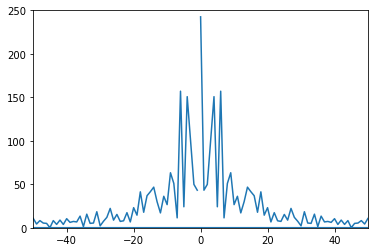

In [3]:
from numpy.fft import fft, fftfreq

S = X[0]
f = np.fft.fft(S)
N = S.size
timestep = 1/FS
f1 = np.fft.fftfreq(N, d=timestep)
plt.plot(f1, abs(f))
plt.axis([-50, 50, 0, 250])
plt.show()

In [4]:
### >>>> Some testing
# Assume that spectral data is in matrix called S and frquency axis is f
assert(X.shape[1]==25600)
assert(abs(sum(sum(np.abs(S)))-13.7)<1)
assert(len(f)==N)

TypeError: 'numpy.float64' object is not iterable

## Plot it in logarithmic scale

You probably noticed that the spectrum does not look very informative. Plot it now in logarithmic scale in decibels. The energy of the sound is relative to the square of the pressure, so we should plot the square of it, but we can accomplish the same by multiplying the log with 20 instead of 10. So plot:

$$L=20 \;\log_{10} | S | $$

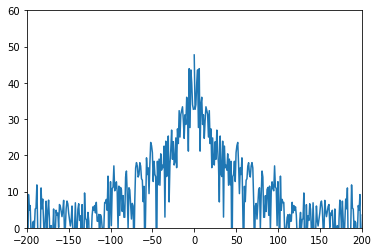

In [5]:
## >>>> Write your code here
L = 20*np.log10(abs(f))
plt.plot(f1, L)
plt.axis([-200, 200, 0, 60])
plt.show()

## Task 2, Average the data into 1/3 octave bands
The frequency resolution is unnecessary high, and therefore we still have 25600 features. We can reduce the number of features, and remove the noise at the same time by averaging the feature vector in time domain. Usually this averaging for sound data is made in Octave bands. The center frequencies for Octave bands can be calculated using the following function:

   $$ f_c = 1000 \cdot 2^{i},$$
   
where $i$ loops through all bands necessary. When $i=0$, the center frequency $f_c=1$ kHz. We can let $i$ go through values in the range $i\in[-6,3]$, to cover frequencies from 15 Hz to 8 kHz.

When the center frequencies are calculated, the frequencies belonging in between the edges of the band are summed together. The edge frequencies are given by dividing and multiplying the center frequency with $\sqrt(2)$. The frequencies summed, $f$, in a certain band those who fullfill the following equation:

  $$ \frac{f_c}{\sqrt{2}} < f < f_c \cdot \sqrt{2} $$

1. Calculate the center frequencies of octave bands
1. Calculate the edge frequencies of each octave bands
1. Apply the edge frequencies to the frequency axis given by 55`fftfreq` to find the indices of those values, which belong to a certain octave band 
1. Sum the data in S-vector into correct octave bands. Please note that S-vector is complex, so you need to sum the absolute values. Use `np.abs()` to do that
1. You can create first an empty matrix where you store your octave band features, like `O=np.zseros((n,p))`
1. Then loop through all `n` samples and `p` bands and store the i:th sample and j:th band to O[i,j]

In [24]:
import math as math
import numpy as np

def getSampleBands(myArray):
    summedValues = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for x in myArray:
        x = abs(x)
        for i in range (len(values)):
            upperLimit = 1/f_low[i]
            lowerLimit = 1/f_up[i]
            if x > lowerLimit and x < upperLimit:
                summedValues[i] = summedValues[i] + x
    return summedValues


#Octave bands center frequencies
values = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3]
f_cent = []
for x in values:
    f_cent.append(1000 * 2**x)

#Octave bands' edge frequencies    
f_up = []
f_low = []

for x in f_center:
    f_up.append(x * math.sqrt(2))
    f_low.append(x / math.sqrt(2))
    
O = np.zeros((60, 10))
for i in range(len(O)):
    O[i, :] = getSampleBands(X[i])
    
print(O)


[[8.95049761e+00 1.80682256e+02 1.38892387e+02 4.85401323e+01
  1.25331313e+01 2.75597009e+00 6.51710632e-01 1.59662507e-01
  3.70657293e-02 8.14581395e-03]
 [1.08358213e+01 1.12617358e+02 1.09988103e+02 5.69680464e+01
  1.85742991e+01 4.14960966e+00 9.59294750e-01 2.43031955e-01
  6.00469365e-02 1.64509035e-02]
 [4.59624156e-02 1.52802275e+02 1.40835755e+02 4.65114378e+01
  1.34400926e+01 3.29659730e+00 8.50054379e-01 2.25534383e-01
  5.02856118e-02 1.39252462e-02]
 [0.00000000e+00 1.54534784e+02 1.64262661e+02 4.60446007e+01
  1.19016942e+01 2.40358399e+00 5.64268276e-01 1.25395478e-01
  3.02168745e-02 6.59856440e-03]
 [0.00000000e+00 1.12925534e+02 1.22875509e+02 5.14892355e+01
  1.48817652e+01 4.61872208e+00 1.24442100e+00 3.23397920e-01
  7.46775468e-02 2.07968546e-02]
 [2.92206050e+01 1.15027336e+02 1.40474450e+02 5.01535041e+01
  1.30008330e+01 3.52784286e+00 8.88030254e-01 2.18321469e-01
  5.87727310e-02 1.51994517e-02]
 [4.57348775e-01 1.67151012e+02 1.70900794e+02 4.70211655e

In [9]:
### >>> Some testing
# Assume that center frequencies are in variable fc and the octave band data in matrix O
assert(len(fc)==10)
assert(O.shape==(60,10))
assert(fc[0]==15.625)
assert((fc[-1]==8000))

NameError: name 'fc' is not defined

## Task 3, plot a pairplot (scatter matrix) and study the result
Now you shold have a new design matrix, which is now called as O. 
1. Initialise a new pandas dataframe, D, using O as a parameter. 
1. Set the center frequency vector as column names to your dataframe
1. Then add the output class variable, Y, into it as new column like `D['class']=Y`, and then plot it as pairplot, perhaps using seaborn, like in lectures
1. Study the plot and try to see which octave bands are usefull in separating the noise sources
1. Does it look probable that you could separate all three classes and which features you would need

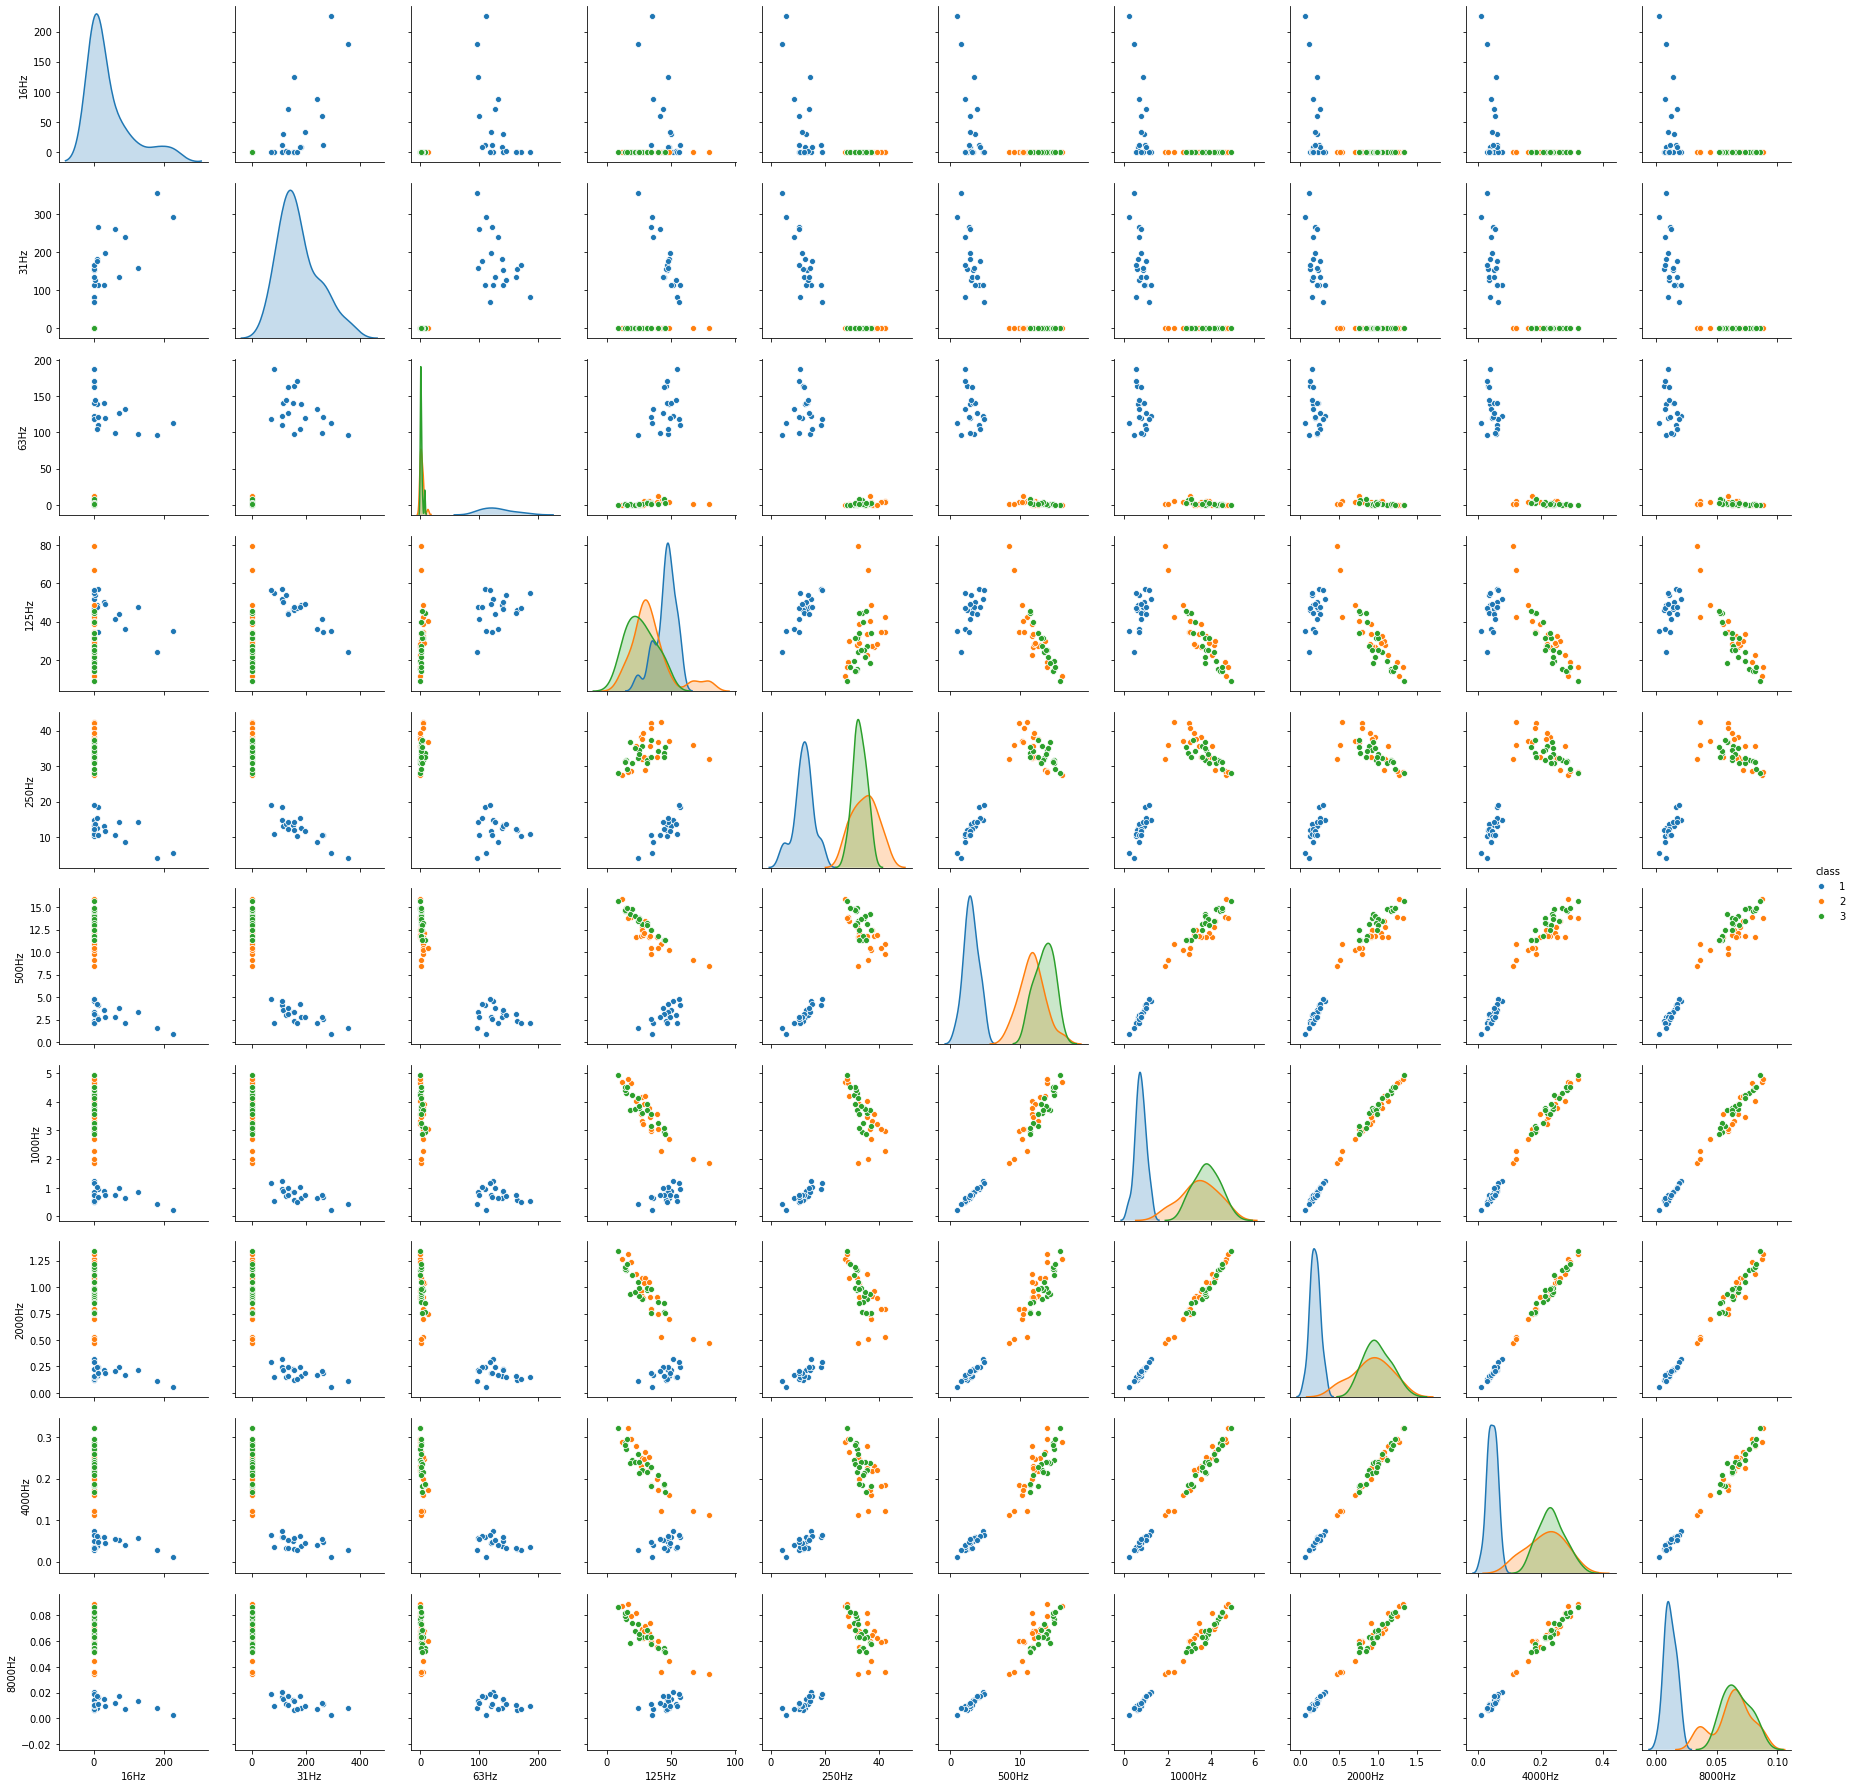

In [25]:
###>>> Write your code here

D = pd.DataFrame(O)
D.columns = ["16Hz", '31Hz', '63Hz', '125Hz', '250Hz', '500Hz', '1000Hz', '2000Hz', '4000Hz', '8000Hz']
D['class'] = Y
sns.pairplot(D, vars=D.columns[:-1], hue="class")

In [16]:
##>>> SOme testing
# Assume that the dataframe is variable D
assert(D.shape==(60,11))

AssertionError: 